### Modelagem

* Tarefas:
    * Buscar os melhores parametros para os seguintes modelos:
        * Random Forest
        * MLP
    * Selecionar o melhor modelo

In [55]:
import numpy as np
import pandas as pd

# scale
from sklearn.preprocessing import StandardScaler

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

# rf
from sklearn.ensemble import RandomForestClassifier
# mlp
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report

# load/save models
from sklearn.externals import joblib

#### Plot Info

In [24]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### load data

In [54]:
# save Scaler
scaler = joblib.load('./data/preprocessamento/zscaler.pkl') 

# save models
X_ros = np.genfromtxt('./data/preprocessamento/X_rox', delimiter=' ')
y_ros = np.genfromtxt('./data/preprocessamento/y_rox', delimiter=' ')

X_smt = np.genfromtxt('./data/preprocessamento/X_smt', delimiter=' ')
y_smt = np.genfromtxt('./data/preprocessamento/y_smt', delimiter=' ')

### test data
X_test = pd.read_csv('./data/preprocessamento/X_test', header=None, sep=' ')
y_test =pd.read_csv('./data/preprocessamento/y_test', header=None, sep=' ')

### Selecionando a partição de cross validation

In [12]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

### Random Forest

In [25]:
n_estimators = [10, 50, 100, 200, 500, 1000]
means = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(rf, X_ros, y_ros, cv=skf)
    means.append(score.mean())

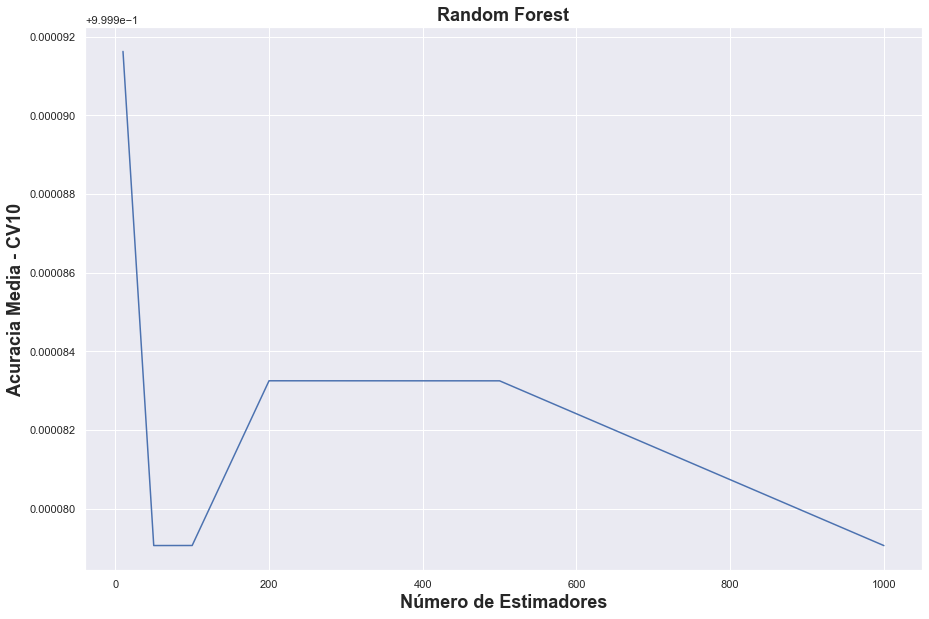

In [49]:
g = sns.lineplot(x=n_estimators, y=means)
g.set_title('Random Forest', fontdict=fontdict)
g.set_ylabel('Acuracia Media - CV10', fontdict=fontdict)
g.set_xlabel('Número de Estimadores', fontdict=fontdict);

Número de Estimadores 10: Obtive o melhor valor

### MLP

* Z-score normalization to train MLP

In [57]:
# first scale the data
X_train_scl, X_test_scl = scaler.transform(X_ros), scaler.transform(X_test)

In [ ]:
hidden_layers = [(8), (16), (32), (50), (100),  (8, 4), (16, 8), (32, 16)]
means = []
for hl in hidden_layers:
    print("Start Layer: " + str(hl))
    mlp = MLPClassifier(hidden_layer_sizes=hl, activation='relu',
                                  solver='adam', alpha=0.0001, batch_size=16, 
                                  early_stopping=True)
    score = cross_val_score(mlp, X_train_scl, y_ros, cv=skf)
    means.append(score.mean())

Start Layer: 8
Start Layer: 16
Start Layer: 32
Start Layer: 50


In [ ]:
g = sns.lineplot(x=n_estimators, y=means)
g.set_title('MLP', fontdict=fontdict)
g.set_ylabel('Acuracia Media - CV10', fontdict=fontdict)
g.set_xlabel('Layers', fontdict=fontdict);